# LGMVIP - Data Science Internship
## DATA SCIENCE INTERN
### AUTHOR: TUSHAR KUMAR
# TASK 1: IRIS FLOWERS CLASSIFICATION
## PURPOSE : Iris flower has three species: setosa, versicolor, and virginica, which differs according to their measurements. We have the measurements of the iris flowers according to their species, and our task is to train a machine learning model that can learn from the measurements of the iris species and classify them.
## STEPS INVOLVED:
### 1. IMPORTING LIBRARIES AND DATA TO BE USED
### 2. GATHERING INSIGHTS
### 3. VISUALIZING DATA
### 4. SPLITTING THE DATA INTO TRAINING AND TEST SET
### 5. MODEL TRAINING AND SELECTION
### 6. MODEL EVALUATION AND PREDICTIVE MODELLING

## Step 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
df = pd.read_csv('Iris.csv') # importing dataset
df = df.drop('Id',axis=1) # dropping Id Column
df.head(10) # fetching the first 10 columns of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Step 2. GATHERING INSIGHTS

In [3]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (150, 5)


In [4]:
# statistical description of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [6]:
# detailed summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# checking missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# checking the categories in Species column
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### THERE ARE NO NULL VALUES IN THE DATA

## Step 3 : VISUALIZING DATA

<AxesSubplot:>

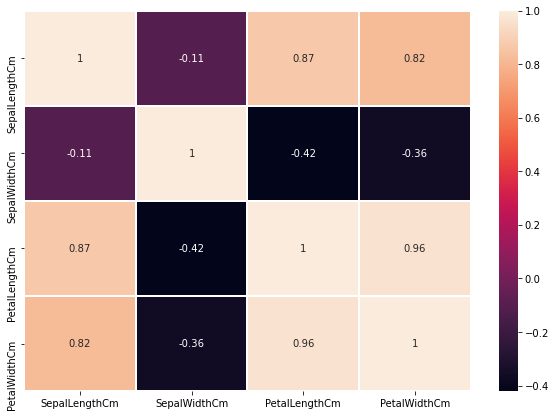

In [10]:
# checking correlation between the columns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),linewidths=1,annot=True)

#### **Correlation between different columns.** 
- "SepalLengthCm" is highly correlated with "PetalLengthCm" and "PetalWidthCm".
- "PetalLenthCm" is highly correlated with "PetalWidthCm".

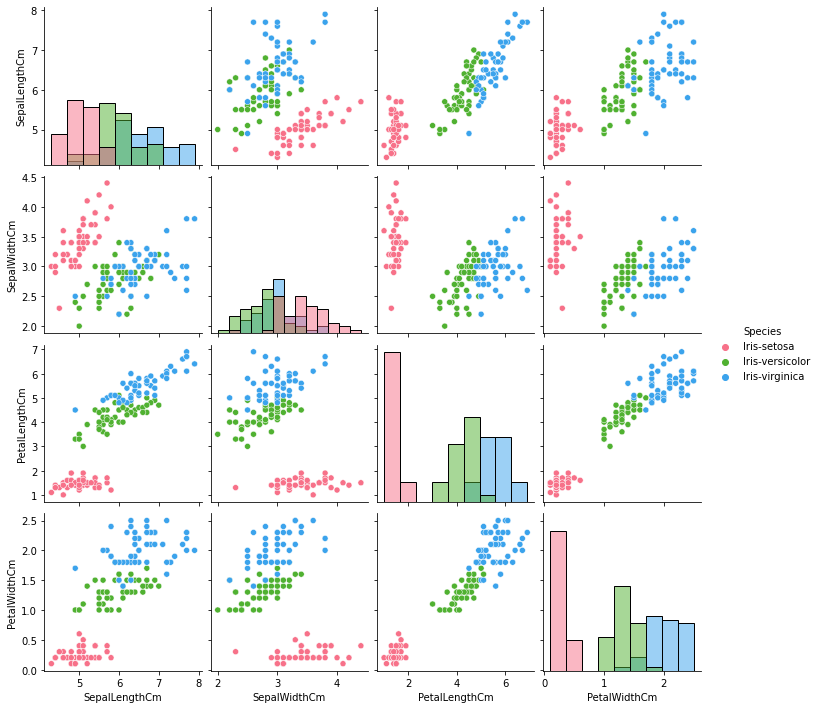

In [11]:
# plotting pairplot
sns.pairplot(df, hue = "Species", palette="husl", diag_kind='hist')

### **Scatterplot of different columns and histogram of same column with different Species**
- The graph of (SepalLengthCm, PetalLengthCm); (SepalLengthCm, PetalWidthCm) and (PetalLengthCm, PetalWidthCm) are showing roughly linear nature.

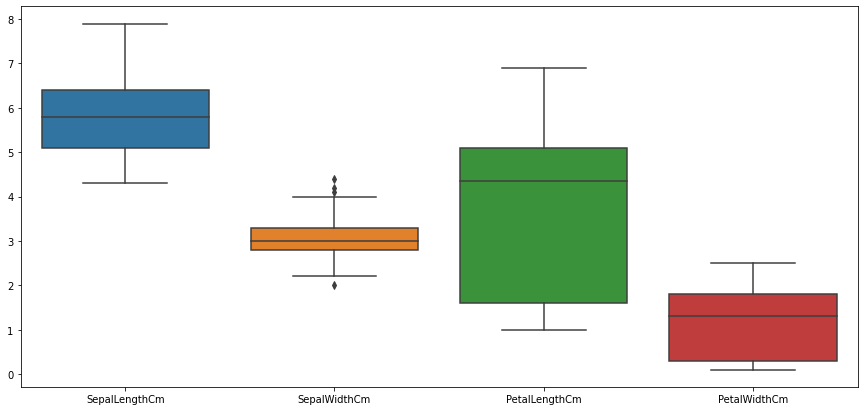

In [16]:
# Box plot for numerical columns
plt.figure(figsize=(15,7))
sns.boxplot(data=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
plt.show()

- **In the column SepalLengthCm, outliers are present. It is visible in the boxplot graph diagram above**

In [17]:
# removing outliers using IQR method
def Detect_Fix_Outliers_IQR(data, col_name):
    q3, q1 = data[col_name].quantile(0.75), data[col_name].quantile(0.25)
    high_threshold, low_threshold = q3 + 1.5*(q3 - q1), q1 - 1.5*(q3 - q1)

    outlier_booleans = np.logical_or(data[col_name].values > high_threshold, data[col_name].values < low_threshold)
    outlier_indexes = np.where(outlier_booleans)[0]

    print(f" Number of Outlier Detected : {len(outlier_indexes)}")

    data[col_name] = np.clip(data[col_name], low_threshold, high_threshold)

    return data

- **Detect and fix the ouliers by using IQR method (Inter Quartile Range).**
- **There are 4 outliers present in the SepalWidth column**
- **Clip the outliers values to the high and low threshold values to improve the data for model testing**

In [18]:
Detect_Fix_Outliers_IQR(data= df, col_name= 'SepalWidthCm')

 Number of Outlier Detected : 4


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


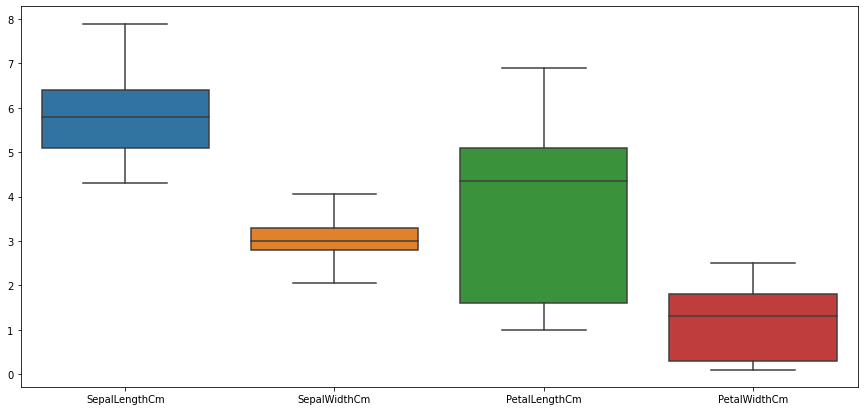

In [19]:
# Updated Box plot for numerical columns
plt.figure(figsize=(15,7))
sns.boxplot(data=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
plt.show()

- **Above diagram of boxplot shows no outliers. Now our data is ready for applying classification model**
- **Separate the Target and Labels columns**

## Step 4. SPLITTING THE DATA INTO TRAINING AND TEST SET

In [21]:
# splitting the data into feature columns and target column
X = df.iloc[:, :-1] # feature column selection using iloc function
y = df.iloc[:, -1] # target column selection

### **Split the data into 80% for training and 20% for testing by using train_test_split from sklearn.model_selection**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Step 5. MODEL TRAINING AND SELECTION

### 5.1 **KNeighborsClassifier Model**

In [24]:
# importing KNeighboursClassifiers model from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
classifier = KNeighborsClassifier()

In [26]:
# fitting the KNeighborsClassifier model into training sets of X and y
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# predicting the test set of feature columns
y_pred = classifier.predict(X_test)

In [28]:
y_test_list, y_pred_list = list(y_test), list(y_pred)

In [29]:
for i in range(30):
    print(f"{y_test_list[i]:20} {y_pred_list[i]:20}")

Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa  

- **Only 1 prediction value of Target variable (Species) is different from test data**

In [30]:
# checking the accuracy score using sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 96.67%


### 5.2 **Logistic Regression Model**

In [31]:
# importing LogisticRegression model from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [32]:
# fitting the model into training data & predicting for test set of feature columns
model = LogisticRegression(max_iter=150)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
y_test_list, y_pred_list = list(y_test), list(y_pred)

In [34]:
for j in range(30):
    print(f"{y_test_list[j]:20} {y_pred_list[j]:20}")

Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa  

In [35]:
accuracy_2 = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy_2, 2)) + '%')

Accuracy: 100.0%


- ### **Logistic Regression gives 100% accuracy**
- ### **Logistic Regression is better than KNeighborsClassifier**

## Step 6. PREDICTIVE MODELLING

In [37]:
a = float(input("Enter SepalLengthCm : "))
b = float(input("Enter SepalWidthCm  : "))
c = float(input("Enter PetalLengthCm : "))
d = float(input("Enter PetalWidthCm  : "))
input_values = [[a, b, c, d]]

# Make predictions for the input values
predicted_species = model.predict(input_values)
print(f"Predicted species: {predicted_species[0]}")

Enter SepalLengthCm : 4.9
Enter SepalWidthCm  : 3.0
Enter PetalLengthCm : 1.4
Enter PetalWidthCm  : 0.2
Predicted species: Iris-setosa
